<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 1
#### Benjamín Ithurburu

### Introducción: 
En este notebook se hará analisis del circuito que se ve a continuación.

<center><img src="./circuito_ejercicio.png" width="500"/></center>

En donde se observará como a partir de ciertas relaciones entre componentes se pueden conseguir diferentes comportamientos del mismo. El análisis se efectuará observando su comportamiento en frecuencia y comparando los resultados obtenidos de forma aproximada, por cálculo numérico y por simulación circuital.

### Cálculo
En el PDF adjuntado a continuación se desarrollan los puntos **1)** y **2)** del trabajo. En primer lugar se realiza la obtención de la función transferencia, con sus respectivos diagrámas aproximados de módulo, fase y diagráma de polos y ceros. En segundo lugar se realiza la normalización de la función transferencia para un caso particular, tanto por frecuencia como por impedancia. Posteriormente se realiza la normalización de la red y su verificación de transferencia.

In [3]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 1.pdf", width=1000, height=1000)

### Simulación Python
En el siguiente código Python se realiza la simulación de la función transferencia normalizada  obtenida en el punto **2)**. Obteniendose el gráfico de módulo, fase, diagráma de polos y ceros, y retardo de grupo.

In [4]:
# Se incluye la librería pytc2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

# módulos numéricos y de funciones científicas
from scipy.signal import TransferFunction
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 12
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

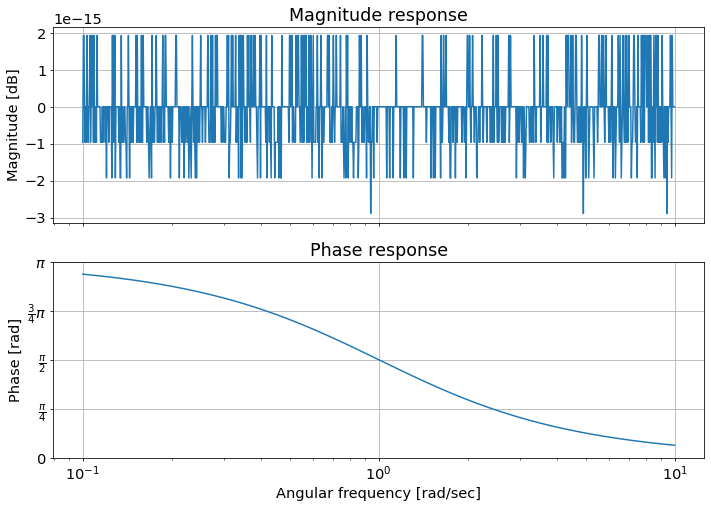

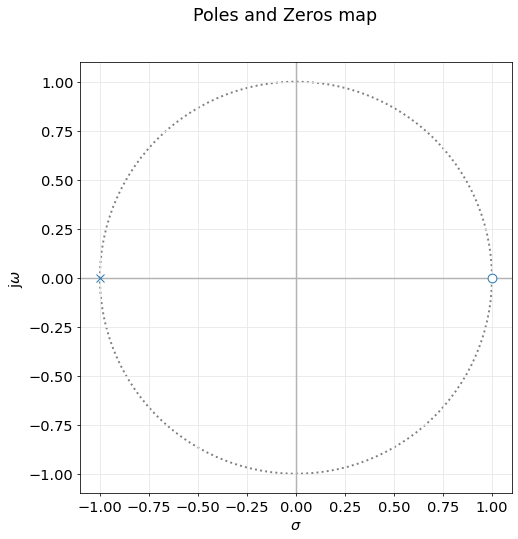

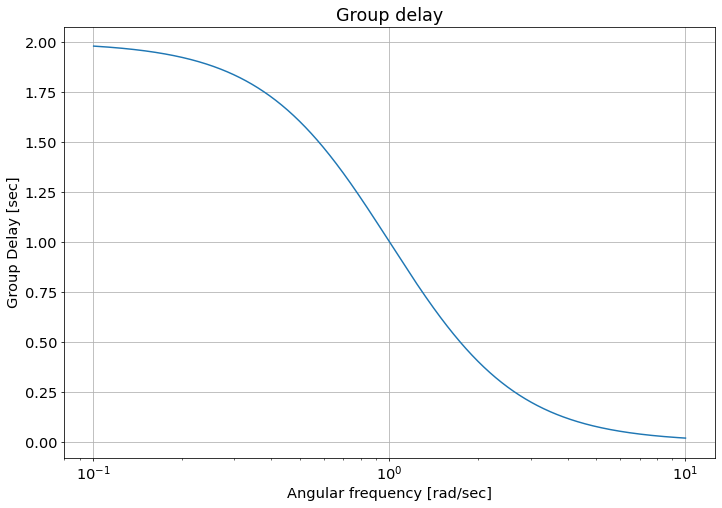

In [6]:
# Código para análisis del filtro

# Obtención de función transferencia
my_tf = TransferFunction([1,-1],[1,1])

# Gráfico Bode
bodePlot(my_tf, fig_id=1)

# Gráfico de Polos y Ceros
pzmap(my_tf, fig_id=2)

# Group Delay
GroupDelay(my_tf, fig_id=3)

### Simulación LTspice
A continuación se realiza la simulación con LTspice de la red normalizada obtenida en el punto **2)**, graficándose su respuesta en frecuencia, tanto en módulo como en fase.

#### Esquemático
<center><img src="./circuito_simulación.png" width="900"/></center>

#### Respuesta en frecuencia
<center><img src="./bode.png" width="900"/></center>

### Conclusión
Esta configuración de red activa tiene la capacidad de comportarse como filtro **Pasa-Altas**, **Pasa_Bajas**, o **Pasa_Todo**, dependiendo de la relación entre $R1$ y $R2$, pero siempre teniendo el mismo comportamiento de fase.
En este caso se particularizó el estudio de la configuración **Pasa_Todo** a partir de aplicar la relación $R1=R2$, en donde se obsevó que funciona simplemete como un rotador de fase de ganancia unitaria. Una red que provoca un salto de fase en $\pi$ o $180º$ a una determinada frecuencia y por su característica de **Pasa_Todo** que no atenúa en ninguna frecuencia en particular, incluso que no produce ganancia o tiene ganancia unitaria $(0dB)$.
Si bien este filtro tiene múltiples utilidades, una de ellas podría ser para eliminar una frecuencia dada en una red mayor, en donde la señal de salida se sumaría a la señal de entrada, eliminandose de esta forma dicha frecuencia por una rotación de $\pi$ o $180º entre ambas.
